# What sould we call ourselves?
This analysis was made after an existential crisis in the VTEX App Store business team. What we do? How should we be called? Where are we going?

We found on Nubank a cool position that looked like what we were doing, called Business Architect, and we decided to do a bit of scrapping to find patterns in the existing content about the job.

Unfortunately, there was a small amount of content, so it was not a very conclusive analysis - and perhaps we are still in an existential crisis.

In [176]:
## Importing the needed libraries
# Scraping
import requests
from bs4 import BeautifulSoup

# NLP
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Dataviz
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [177]:
# Defining the data sources and downloading some requirements
allLinks = ['https://boards.greenhouse.io/nubank/jobs/1775978',
            'https://blog.nubank.com.br/business-architect-nubank/']
stopWords = stopwords.words("english")

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [178]:
# Appending some specific words to remove too
extra = ['nubank','we','team','teams','architect','architects','in','million','company','work','new','great','latin','america','first','years','opacity','selector','chapter','us','fill','bizarch',
         'bizarchs','role','skills','var','keyframes','one','order','three','things','duration']

for i in extra:
  stopWords.append(i)

In [179]:
# Defining a simple function to import content from web pages and append it to a list...
allContent = []

def importContent(url, type, search_item):
  # `url` is the link you want to scrap,
  # `type` is where you choose to scrap by selecting an id or a class,
  # `search_item` is the id or the class of the element you want to import from this specific url.
  if type == 'id':
    currentLink = BeautifulSoup(requests.get(url).content).find(id=search_item).get_text()
    allContent.append(currentLink.replace('\n',''))
  if type == 'class':
    currentLink = BeautifulSoup(requests.get(url).content).find(class_=search_item).get_text()
    allContent.append(currentLink.replace('\n',''))

In [180]:
# ...and then, importing the content from the first link itself
importContent(allLinks[0],"id","content")
allContent

['About NubankNubank is the leading financial technology company in Latin America and the largest independent neobank in the world, with around 20 million clients. Its first product, launched in 2014, is a no-fee credit card that is fully managed by a mobile app and used by more than 10 million customers. Almost 36 million Brazilians have requested its products. In 2017, Nubank launched its proprietary loyalty rewards program ("Nubank Rewards"), as well as a digital account ("NuConta") that is already used by more than 12 million people. In 2019, the company began testing its personal loan product and took its first steps in international expansion, opening offices in Mexico and Argentina. To date, Nubank has raised around US$ 820 million in seven equity investment rounds from TCV, Sequoia Capital, Kaszek Ventures, Tiger Global Management, QED, Founders Fund, DST Global, Redpoint Ventures, Ribbit Capital, Dragoneer Investment Group, Thrive Capital and Tencent. Recently, Nubank was elec

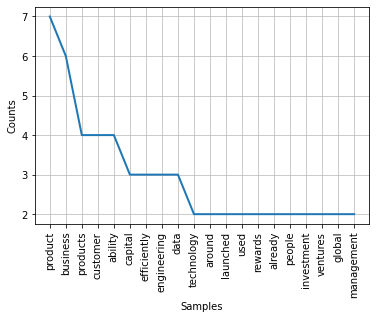

In [181]:
## Doing the cool stuff at Nubank's job description
# Tokenizing the text into words
firstText = []
firstWords = []
firstText = word_tokenize(allContent[0].lower())

# Removing stopwords and point marks
for i in firstText:
  if i.isalpha() and i not in stopWords:
    firstWords.append(i)

# Testing the frequency
FreqDist(firstWords).plot(20)

In [182]:
# Importing the content from the second link
importContent(allLinks[1],"class","article-content")
allContent

['About NubankNubank is the leading financial technology company in Latin America and the largest independent neobank in the world, with around 20 million clients. Its first product, launched in 2014, is a no-fee credit card that is fully managed by a mobile app and used by more than 10 million customers. Almost 36 million Brazilians have requested its products. In 2017, Nubank launched its proprietary loyalty rewards program ("Nubank Rewards"), as well as a digital account ("NuConta") that is already used by more than 12 million people. In 2019, the company began testing its personal loan product and took its first steps in international expansion, opening offices in Mexico and Argentina. To date, Nubank has raised around US$ 820 million in seven equity investment rounds from TCV, Sequoia Capital, Kaszek Ventures, Tiger Global Management, QED, Founders Fund, DST Global, Redpoint Ventures, Ribbit Capital, Dragoneer Investment Group, Thrive Capital and Tencent. Recently, Nubank was elec

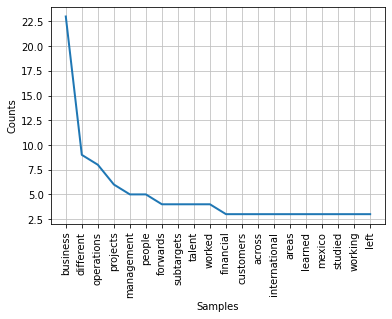

In [183]:
## Doing the cool stuff at Nubank's article
# Tokenizing the text into words
secondText = []
secondWords = []
secondText = word_tokenize(allContent[1].lower())

# Removing stopwords and point marks
for i in secondText:
  if i.isalpha() and i not in stopWords:
    secondWords.append(i)

# Testing the frequency
FreqDist(secondWords).plot(20)